/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


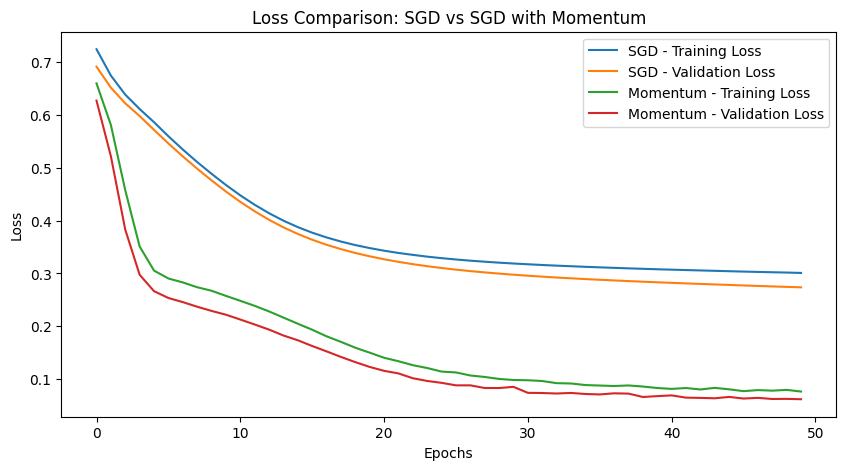

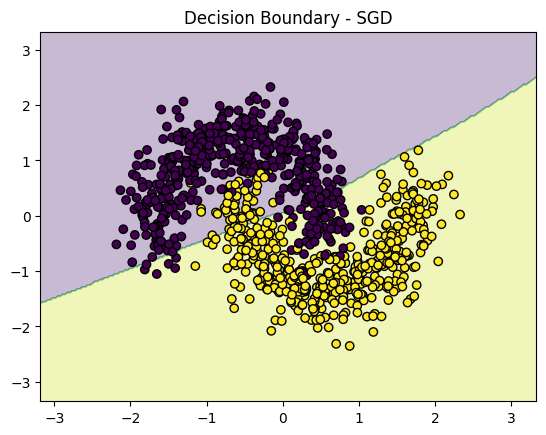

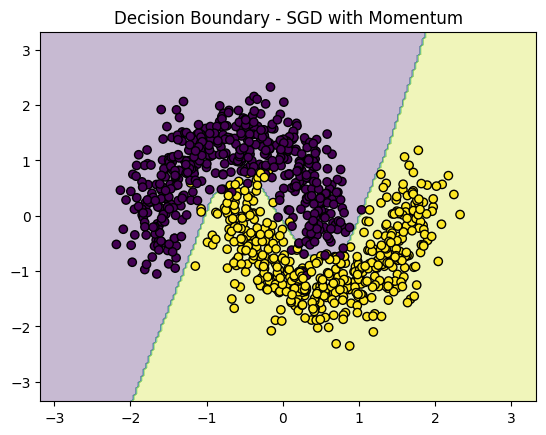

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Generate toy dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to build simple neural net
def build_model():
    model = Sequential([
        Dense(16, activation='relu', input_shape=(2,)),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# Train with vanilla SGD
sgd_model = build_model()
sgd_model.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
history_sgd = sgd_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=0)

# Train with SGD + Momentum
momentum_model = build_model()
momentum_model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])
history_momentum = momentum_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=0)

# Plot loss comparison
plt.figure(figsize=(10,5))
plt.plot(history_sgd.history['loss'], label='SGD - Training Loss')
plt.plot(history_sgd.history['val_loss'], label='SGD - Validation Loss')
plt.plot(history_momentum.history['loss'], label='Momentum - Training Loss')
plt.plot(history_momentum.history['val_loss'], label='Momentum - Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Comparison: SGD vs SGD with Momentum')
plt.legend()
plt.show()

# Function to plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()], verbose=0)
    Z = (Z > 0.5).astype(int).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.show()

# Decision boundary plots
plot_decision_boundary(sgd_model, X, y, 'Decision Boundary - SGD')
plot_decision_boundary(momentum_model, X, y, 'Decision Boundary - SGD with Momentum')
